# Capstone Project III

### For this project, we use recurrent neural networks in Keras to try and classify a movie review as either positive or negative.

### Steps:
   1. Get the dataset
   2. Preprocessing the data
   3. Build the Model
   4. Train the Model
   5. Test the Model
   6. Predict something

In [319]:
# Importing required libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
from tensorflow import keras
import seaborn as sns
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, SpatialDropout1D, BatchNormalization, LSTM
from sklearn.model_selection import train_test_split

In [320]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [321]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [322]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
    return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [323]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [324]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
#from keras.utils import to_categorical
labels  = keras.utils.to_categorical(to_numeric_label(word_labels))
#print("data:", len(data))
#print("labels:", len(labels))
print("reviews")
data[0:5]

reviews


['one of the best crichton novels',
 'the medicine of the future',
 'beautiful',
 'for lovers of robicheaux',
 'a good book']

In [325]:
print("labels")
labels[0:5]

labels


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [326]:
len(word_labels)

1793

In [327]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
# - Calculate the number of unique words in the dataset
# - Perform any other dataset investigation that you feel would be valuable

In [328]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:4])
print(tokenized_data[0:4])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4]]


# Pre-processing

In [329]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
len(tokenized_data)
tokenized_data = sequence.pad_sequences(tokenized_data, maxlen=4)
len(tokenized_data)

1793

In [330]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
X_train, X_test, y_train, y_test = train_test_split(tokenized_data,labels 
                , test_size=0.20, random_state=42, shuffle=True)

In [331]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (1434, 4)
X_test (359, 4)
y_train (1434, 2)
y_test (359, 2)


In [332]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):
    y_pred = model(X_test)
    y_pred=model.predict(X_test) 
    y_pred=np.argmax(y_pred, axis=1)
    y_test=np.argmax(y_test, axis=1)    
    print("precision_score: {}".format(precision_score(y_pred, y_test)))
    print("recall_score: {}".format(recall_score(y_pred, y_test)))
    print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
    print('Confusion matrix: {}'.format(confusion_matrix(y_pred, y_test)))


# Build and tune model

Define network architecture

In [333]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=150, input_length=4))
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

Train model

In [334]:
#compile the model and adjust parameter
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [335]:
# fit the model
hist = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=15, batch_size=80)


Epoch 1/15
18/18 [==============================] - 4s 56ms/step - loss: 0.6912 - accuracy: 0.5295 - val_loss: 0.6905 - val_accuracy: 0.5097
Epoch 2/15
18/18 [==============================] - 0s 13ms/step - loss: 0.6618 - accuracy: 0.6137 - val_loss: 0.6894 - val_accuracy: 0.5376
Epoch 3/15
18/18 [==============================] - 0s 14ms/step - loss: 0.6455 - accuracy: 0.6397 - val_loss: 0.6881 - val_accuracy: 0.5710
Epoch 4/15
18/18 [==============================] - 0s 15ms/step - loss: 0.6343 - accuracy: 0.6434 - val_loss: 0.6867 - val_accuracy: 0.5571
Epoch 5/15
18/18 [==============================] - 0s 15ms/step - loss: 0.6364 - accuracy: 0.6280 - val_loss: 0.6856 - val_accuracy: 0.5627
Epoch 6/15
18/18 [==============================] - 0s 16ms/step - loss: 0.6324 - accuracy: 0.6283 - val_loss: 0.6844 - val_accuracy: 0.5738
Epoch 7/15
18/18 [==============================] - 0s 13ms/step - loss: 0.6268 - accuracy: 0.6382 - val_loss: 0.6831 - val_accuracy: 0.5710
Epoch 8/15
18

Examine performance of model

In [336]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 4, 150)            384000    
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 4, 150)            0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 4, 150)            600       
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                23424     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 408,090
Trainable params: 407,790
Non-trainable params: 300
_________________________________________________________________
None


In [337]:
scores = model.evaluate(X_test, y_test)
print('Test score:', scores[0])
print('Test accuracy:', scores[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5961
Test score: 0.6654401421546936
Test accuracy: 0.5961002707481384


Plot graphs for accuracy and loss

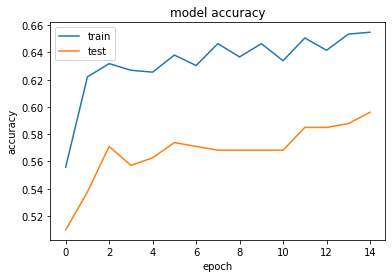

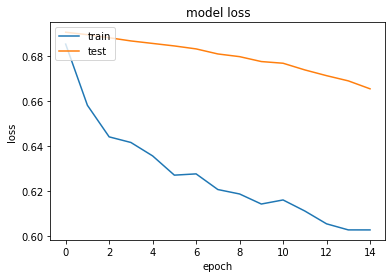

In [338]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Make a prediction

In [339]:
# This is a very small set of completed new data to use to make predictions.
maxlen = 4
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = sequence.pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

In [340]:
y_pred = model.predict(padded)

In [341]:
y = to_word_label(y_pred)

In [342]:
print(len(prediction_data),prediction_data)
print(len(y), y)

5 ['this book is fabulous', 'i hated this book', 'the best', 'no good', 'okay']
5 ['negative', 'negative', 'positive', 'negative', 'negative']


### Assessing the model

In [343]:
assess_model(model=model, X_test=X_test, y_test=y_test)

precision_score: 0.7486338797814208
recall_score: 0.5805084745762712
F1-score: 0.6539379474940333
Confusion matrix: [[ 77  46]
 [ 99 137]]


#### Findings

In [344]:
# Our model for this sentimental analysis only predicted about 50% of the data given correctly. I think this has to do with the 
# insufficient amount of data the model trained with.